# Important Transformations & Graphs for Final Jupyter Notebook

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

# Box Office Mojo

In [3]:
# Making a df from Box Office Mojo data
bom_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
# Looking to see if the data was read correctly
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Cleaning the comma from one of the foreign_gross points
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(",", "")
# and turn it into a float
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(float)

In [5]:
# Let's make the total gross column and check it out
# First we need to replace Nan with 0, so we don't lose all of our smaller films
bom_df['foreign_gross'].fillna(0, inplace=True)
# If we didn't replace those, we would lose over 1000 values
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [7]:
# DONT RUN THIS TWICE OR IT WILL DIVIDE 'total_gross' TWICE
# It's hard to make meaning out of all these 0's, let's make these numbers more readable
# We'll work with the total gross in millions, this will make the smaller observations less readable,
# but we're trying to compete in the big league. 
bom_df['total_gross(mil)'] = bom_df['total_gross'] / 1000000
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross(mil)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,960.3
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,752.6


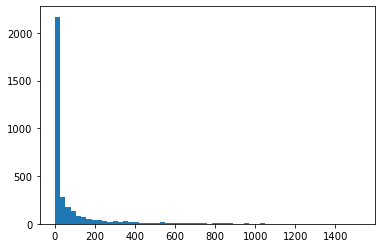

In [9]:
# First we'll set our figure name to grossing_hist
grossing_hist, ax = plt.subplots()
# Now we'll make a histogram of the data, we choose the number of bins by square root of n
ax.hist(bom_df['total_gross(mil)'], bins=round(3359**.5));

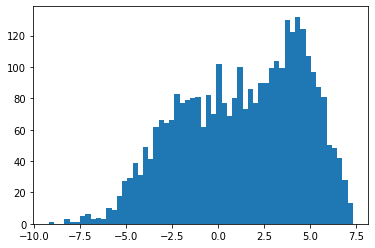

In [12]:
# As expected, we're gonna need to use a logarithmic scale to make any sense of this data
log_of_gross_hist, ax = plt.subplots()
# Here we use the numpy function, log, which will broadcast to the entire series
ax.hist(np.log(bom_df['total_gross(mil)']), bins=round(3359**.5));

This graph shows that total gross increases exponentially as quality increases. This suggests that small improvements would result in exponential improvemnt in total gross (and also that small mistakes can cause outsized amount of harm to total gross).

#  IMDB

In [14]:
con = sqlite3.connect('C:/Users/TWood/Documents/FlatironMaterials/project_1/im.db')
imdb_directors = pd.read_sql("""
WITH director_names AS (
    WITH distinct_rows AS (
        SELECT
            DISTINCT movie_id, person_id
        FROM
            directors
    )
    SELECT
        p.person_id, p.primary_name, p.birth_year, p.death_year, p.primary_profession,
        distinct_rows.movie_id
    FROM
        persons as p
        INNER JOIN distinct_rows
            ON p.person_id = distinct_rows.person_id
)
SELECT 
    b.movie_id, b.primary_title, b.original_title, b.start_year, b.runtime_minutes, b.genres,
    d.person_id, d.primary_name, d.birth_year, d.death_year, d.primary_profession
FROM
    movie_basics as b
    LEFT JOIN director_names as d
        ON b.movie_id = d.movie_id
;""", con)
imdb_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,Raoul Ruiz,1941.0,2011.0,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...
169256,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,nm9272491,Ana Célia de Oliveira,NaN,NaN,"producer,director,writer"
169257,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440,Kanchan Nayak,NaN,NaN,director
169258,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612,Kiran Gawade,NaN,NaN,None
169259,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director"


In [23]:
imdb_genres = pd.read_sql("""
SELECT movie_id,
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;""", con)
imdb_genres

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,None,6.6,5


In [31]:
imdb_genres.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [36]:
# I think it would be useful to only look at films popular enough to have more than 10,000 reviews
imdb_genres_refined = imdb_genres[imdb_genres['numvotes'] >= 10000]

In [35]:
# try and find all the different genres
imdb_genres['genres'].value_counts().head(50)

Drama                            11612
Documentary                      10313
Comedy                            5613
Horror                            2692
Comedy,Drama                      2617
Thriller                          1555
Drama,Romance                     1510
Comedy,Romance                    1236
Comedy,Drama,Romance              1208
Horror,Thriller                   1004
Drama,Thriller                     990
Action                             979
Romance                            717
Biography,Documentary              694
Documentary,Drama                  582
Documentary,Music                  579
Comedy,Horror                      579
Action,Crime,Drama                 562
Crime,Drama,Thriller               504
Crime,Drama                        494
Family                             491
Biography,Documentary,History      479
Drama,Family                       478
Documentary,History                476
Action,Drama                       395
Horror,Mystery,Thriller  

In [37]:
# makes it easiest to work with when the data is as tabular as possible
imdb_genres_refined['Drama'] = imdb_genres['genres'].str.contains('Drama')
imdb_genres_refined['Action'] = imdb_genres['genres'].str.contains('Action')
imdb_genres_refined['Crime'] = imdb_genres['genres'].str.contains('Crime')
imdb_genres_refined['Biography'] = imdb_genres['genres'].str.contains('Biography')
imdb_genres_refined['Comedy'] = imdb_genres['genres'].str.contains('Comedy')
imdb_genres_refined['Fantasy'] = imdb_genres['genres'].str.contains('Fantasy')
imdb_genres_refined['Documentary'] = imdb_genres['genres'].str.contains('Documentary')
imdb_genres_refined['Thriller'] = imdb_genres['genres'].str.contains('Thriller')
imdb_genres_refined['Mystery'] = imdb_genres['genres'].str.contains('Mystery')
imdb_genres_refined['Horror'] = imdb_genres['genres'].str.contains('Horror')
imdb_genres_refined['Romance'] = imdb_genres['genres'].str.contains('Romance')
imdb_genres_refined['Family'] = imdb_genres['genres'].str.contains('Family')
imdb_genres_refined['History'] = imdb_genres['genres'].str.contains('History')
imdb_genres_refined['Mystery'] = imdb_genres['genres'].str.contains('Mystery')
imdb_genres_refined['Sci-Fi'] = imdb_genres['genres'].str.contains('Sci-Fi')
imdb_genres_refined['Animation'] = imdb_genres['genres'].str.contains('Animation')
imdb_genres_refined['Adventure'] = imdb_genres['genres'].str.contains('Adventure')
# This should be enough genres to cover our bases
imdb_genres_refined

<ipython-input-37-60719bb4afd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres_refined['Drama'] = imdb_genres['genres'].str.contains('Drama')
<ipython-input-37-60719bb4afd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres_refined['Action'] = imdb_genres['genres'].str.contains('Action')
<ipython-input-37-60719bb4afd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,movie_id,primary_title,genres,averagerating,numvotes,Drama,Action,Crime,Biography,Comedy,...,Documentary,Thriller,Mystery,Horror,Romance,Family,History,Sci-Fi,Animation,Adventure
31,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
41,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
47,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
48,tt0360556,Fahrenheit 451,"Drama,Sci-Fi,Thriller",4.9,14469,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
51,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71282,tt8632862,Fahrenheit 11/9,Documentary,6.7,11628,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
72184,tt8954732,The Princess Switch,Romance,6.0,13993,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
73206,tt9412098,Fyre,"Documentary,Music",7.3,25387,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
73304,tt9495224,Black Mirror: Bandersnatch,"Drama,Mystery,Sci-Fi",7.3,91349,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [38]:
# I know this is ugly, probably should've made a function, too far invested to go back now
Drama_mean = imdb_genres_refined[imdb_genres['Drama'] == True]['averagerating'].mean()
print(Drama_mean)
Documentary_mean= imdb_genres_refined[imdb_genres['Documentary'] == True]['averagerating'].mean()
print(Documentary_mean)
Comedy_mean= imdb_genres_refined[imdb_genres['Comedy'] == True]['averagerating'].mean()
print(Comedy_mean)
Horror_mean= imdb_genres[imdb_genres['Horror'] == True]['averagerating'].mean()
print(Horror_mean)
Thriller_mean= imdb_genres_refined[imdb_genres['Thriller'] == True]['averagerating'].mean()
print(Thriller_mean)
Romance_mean= imdb_genres_refined[imdb_genres['Romance'] == True]['averagerating'].mean()
print(Romance_mean)
Action_mean= imdb_genres_refined[imdb_genres['Action'] == True]['averagerating'].mean()
print(Action_mean)
Biography_mean= imdb_genres_refined[imdb_genres['Biography'] == True]['averagerating'].mean()
print(Biography_mean)
Family_mean= imdb_genres_refined[imdb_genres['Family'] == True]['averagerating'].mean()
print(Family_mean)
History_mean= imdb_genres_refined[imdb_genres['History'] == True]['averagerating'].mean()
print(History_mean)
Mystery_mean= imdb_genres_refined[imdb_genres['Mystery'] == True]['averagerating'].mean()
print(Mystery_mean)
SciFi_mean= imdb_genres_refined[imdb_genres['Sci-Fi'] == True]['averagerating'].mean()
print(SciFi_mean)
Crime_mean= imdb_genres_refined[imdb_genres['Crime'] == True]['averagerating'].mean()
print(Crime_mean)
Animation_mean= imdb_genres_refined[imdb_genres['Animation'] == True]['averagerating'].mean()
print(Animation_mean)
Adventure_mean= imdb_genres_refined[imdb_genres['Adventure'] == True]['averagerating'].mean()
print(Adventure_mean)
# Looks like Documentary, Biography, and History movies all score above a 7 on average rating
# Outside of the non-fiction films, Drama and Animation movies score the highest

<ipython-input-38-f7ba5929a431>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Drama_mean = imdb_genres_refined[imdb_genres['Drama'] == True]['averagerating'].mean()
<ipython-input-38-f7ba5929a431>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Documentary_mean= imdb_genres_refined[imdb_genres['Documentary'] == True]['averagerating'].mean()
<ipython-input-38-f7ba5929a431>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Comedy_mean= imdb_genres_refined[imdb_genres['Comedy'] == True]['averagerating'].mean()
<ipython-input-38-f7ba5929a431>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Thriller_mean= imdb_genres_refined[imdb_genres['Thriller'] == True]['averagerating'].mean()
<ipython-input-38-f7ba5929a431>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Romance_mean= imdb_genres_refined[imdb_genres['Romance'] == True]['a

6.7600269179004036
7.442857142857145
6.407982261640798
5.003440187646598
6.338684719535784
6.531067961165048
6.414500683994528
7.100416666666666
6.295454545454546
7.0872340425531934
6.335272727272727
6.435023041474655
6.547334754797441
6.86
6.524481327800829


<ipython-input-38-f7ba5929a431>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Adventure_mean= imdb_genres_refined[imdb_genres['Adventure'] == True]['averagerating'].mean()
